In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load some data in a pandas dataframe

df = None
#df = pd.read_csv("C:/Users/.../Oilanalysis.csv") #for those who would like to work from a local drive
df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [4]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

#df.dtypes

In [7]:
# get a preview on the data

#df.head(3)
#df.describe()
#len(df["BRSTVD"])

In [9]:
# plot histograms of the data in the dataframe
# causal effects of the columns that just contain one value remain invisible "ceteris paribus"
# check for outliers and explain them eventually

#for col in df.columns: 
#    try:      
#        df[col] = pd.to_numeric(df[col]) 
#        df.hist(column=col)
#    except ValueError:
#        print("The column "+col+' can not be represented as a histogram')

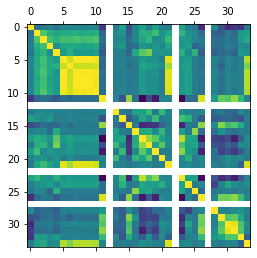

Index(['Age', 'BRSTVD', 'ISO 4406 large', 'ISO 4406 medium', 'ISO 4406 small',
       'LNF-ROET', 'LNF-CUT', 'LNF-FIB', 'LNF-FW', 'LNF-NMW', 'LNF-SSW',
       'LNF-UNC', 'P', 'V', 'AL', 'BA', 'CA', 'CR', 'CU', 'FE', 'MG', 'MN',
       'NA', 'NI', 'PB', 'SI', 'SN', 'ZN', 'LI', 'TAN', 'TBN', 'VIS40',
       'VIS99', 'VLAMCC', 'WATER'],
      dtype='object')


In [10]:
#create a correlation matrix to check for pairwise linear dependencies among the columns

dummy=df.iloc[:,1:]    #remove the "Age" column that is not numerical
dummy.corr(min_periods=15)
plt.matshow(dummy.corr(min_periods=15))
plt.show()
print(df.columns)

del dummy

array([[<AxesSubplot:xlabel='P', ylabel='P'>,
        <AxesSubplot:xlabel='CU', ylabel='P'>,
        <AxesSubplot:xlabel='MG', ylabel='P'>,
        <AxesSubplot:xlabel='PB', ylabel='P'>,
        <AxesSubplot:xlabel='ZN', ylabel='P'>],
       [<AxesSubplot:xlabel='P', ylabel='CU'>,
        <AxesSubplot:xlabel='CU', ylabel='CU'>,
        <AxesSubplot:xlabel='MG', ylabel='CU'>,
        <AxesSubplot:xlabel='PB', ylabel='CU'>,
        <AxesSubplot:xlabel='ZN', ylabel='CU'>],
       [<AxesSubplot:xlabel='P', ylabel='MG'>,
        <AxesSubplot:xlabel='CU', ylabel='MG'>,
        <AxesSubplot:xlabel='MG', ylabel='MG'>,
        <AxesSubplot:xlabel='PB', ylabel='MG'>,
        <AxesSubplot:xlabel='ZN', ylabel='MG'>],
       [<AxesSubplot:xlabel='P', ylabel='PB'>,
        <AxesSubplot:xlabel='CU', ylabel='PB'>,
        <AxesSubplot:xlabel='MG', ylabel='PB'>,
        <AxesSubplot:xlabel='PB', ylabel='PB'>,
        <AxesSubplot:xlabel='ZN', ylabel='PB'>],
       [<AxesSubplot:xlabel='P', ylabel='ZN'>

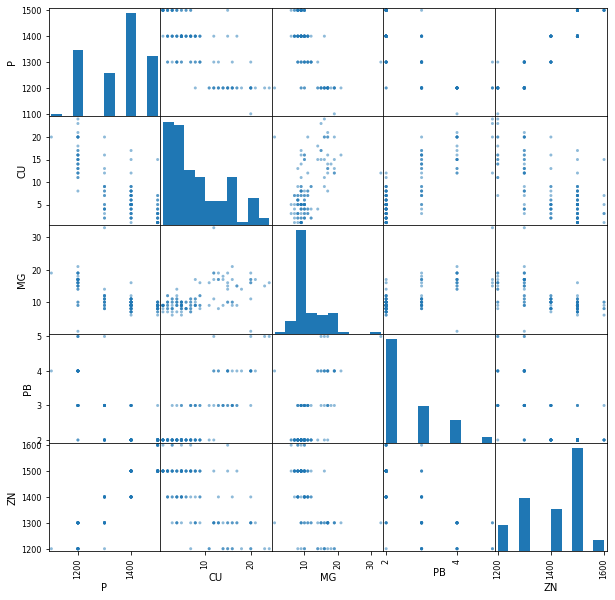

In [88]:
# expand some of the stronger linear dependencies in scatterplots

#pd.plotting.scatter_matrix(df.iloc[:,2:5],figsize=(10,10)) #plot the ISO4406 measurements
#pd.plotting.scatter_matrix(df.iloc[:,6:12],figsize=(10,10)) #plot the LNF measurements
#pd.plotting.scatter_matrix(df.iloc[:,[6,22,34]],figsize=(10,10)) #show that Na, Water correlates with LNF due to the outlier
#pd.plotting.scatter_matrix(df.iloc[:,[1,31,32,33]],figsize=(10,10)) #plot BRSTFVD,VISxx,VLAMCC
pd.plotting.scatter_matrix(df.iloc[:,[12,18,20,24,27]],figsize=(10,10)) #plot P, Cu, Mg, Pb, Zn


# 1-11 ['BRSTVD', 'ISO 4406 large', 'ISO 4406 medium', 'ISO 4406 small','LNF-ROET', 'LNF-CUT', 'LNF-FIB', 'LNF-FW', 'LNF-NMW', 'LNF-SSW',
#12-21 'LNF-UNC', 'P', 'V', 'AL', 'BA', 'CA', 'CR', 'CU', 'FE', 'MG',
#22-31 'MN', 'NA', 'NI', 'PB', 'SI', 'SN', 'ZN', 'LI', 'TAN', 'TBN', 'VIS40',
#32-34 'VIS99', 'VLAMCC', 'WATER']

In [11]:
#perform k-means clustering to check for nonlinear dependencies among the df columns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


In [12]:
#dispose first column of the dataframe because it is not numerical

X=df.iloc[:,1:]


In [14]:
#impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=20, weights="distance")
X=imputer.fit_transform(X)


In [17]:
#transpose the dataframe while disposing the first non-numerical column

scaler=StandardScaler()

X = scaler.fit_transform(X)
#print(scaler.mean_)


[-2.77555756e-17  4.16333634e-17  3.05311332e-16 -1.30104261e-17
  9.71445147e-17  1.38777878e-17 -5.89805982e-17  4.16333634e-17
 -4.85722573e-17  1.38777878e-17 -4.16333634e-17 -4.16333634e-17
  0.00000000e+00  4.16333634e-17  3.46944695e-17 -2.77555756e-17
  4.16333634e-17  1.56125113e-17 -1.38777878e-17 -6.93889390e-18
 -8.32667268e-17  0.00000000e+00  0.00000000e+00  2.77555756e-17
 -2.42861287e-17  6.93889390e-18  2.08166817e-17  0.00000000e+00
 -2.15105711e-16 -1.11022302e-16  4.85722573e-16  2.98372438e-16
  1.25593980e-15 -2.77555756e-16]


In [19]:
#prepare an elbow plot to visually determine a feasible number of clusters

inertia = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)


C:\Users\Chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


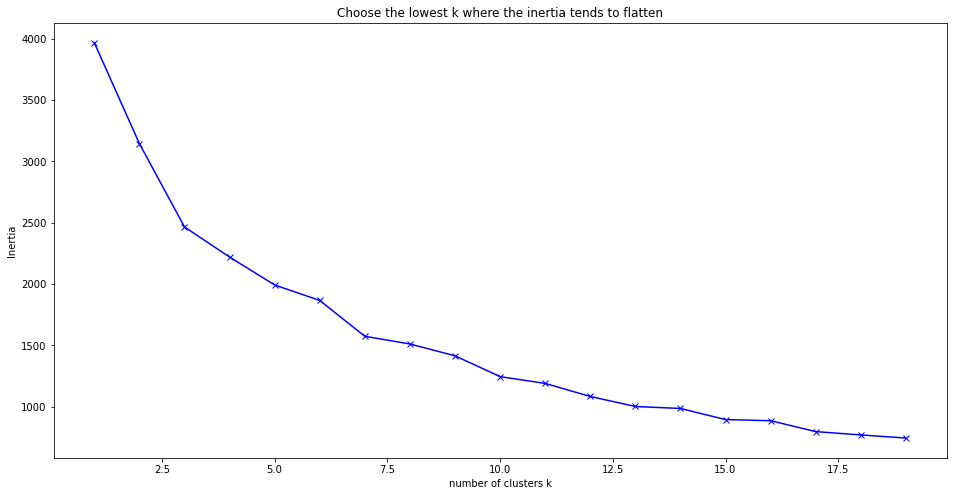

In [20]:
#create the elbow plot

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Inertia')
plt.title('Choose the lowest k where the inertia tends to flatten')
plt.show()


In [32]:
# perform the k-means clustering while filling the preferred number of clusters in the first line

#the number of clusters k is:
k=3

kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(X)
kmeanModel.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [33]:
# display some properties of the clustering as one whishes to

#kmeanModel.inertia_
#kmeanModel.labels_
#kmeanModel.n_iter_
#kmeanModel.cluster_centers_

In [34]:
# create a dataframe of the clustercenters

dfclustercenters=pd.DataFrame(kmeanModel.cluster_centers_, columns=df.columns[1:])
dfclustercenters


,BRSTVD,ISO 4406 large,ISO 4406 medium,ISO 4406 small,LNF-ROET,LNF-CUT,LNF-FIB,LNF-FW,LNF-NMW,LNF-SSW,...,SI,SN,ZN,LI,TAN,TBN,VIS40,VIS99,VLAMCC,WATER
0,-0.277370,-0.201110,-0.135693,-0.107678,-0.188907,-0.098733,-0.144852,-0.089307,-0.093544,-0.092383,...,-0.043799,-0.088736,0.611106,0.0,0.147270,0.454575,0.445430,0.553248,0.262631,0.008258
1,0.479575,0.283159,0.139503,0.134280,0.290356,-0.068726,0.048540,-0.083786,-0.079455,-0.080306,...,0.023910,0.158181,-1.055225,0.0,-0.266556,-0.773285,-0.795524,-0.969989,-0.458317,-0.140754
2,0.406554,3.264593,4.573998,2.545010,1.945100,11.158806,9.500171,11.088012,11.231963,11.177106,...,2.447899,-0.088736,-0.959214,0.0,0.332725,-1.249486,0.514238,-0.193582,-0.190482,5.805793


In [35]:
# add the clusterlabels to the dataframe of samples

df["clusterlabels"]=kmeanModel.labels_
#df=df.sort_values("clusterlabels")
#df.describe()
dfclustermeans=df.groupby("clusterlabels").mean()

In [36]:
# save the dataframes

#dfclustercenters.to_csv("C:/Users/Chris/Pythonprojects/RAMS/notebook/clustercenters.csv", decimal=",")
df.to_csv("C:/Users/Chris/Pythonprojects/RAMS/notebook/clusteredsamples.csv",decimal=",")
dfclustermeans.to_csv("clustermeans.csv",decimal=",")